<font color='green' size='6'>Italy </font>
<font color ='red' size='6'>Menu</font>
<br>

## Research Question
#### Generating meal compositions with AI

**Name:** Andrea <br>
**Name:** Emilio <br>
**Name:** Mayya Lihovodov <br>

**Name:** Igal Khalfin <br>
**Name:** Dima Vornov  <br>
**Name:** Adi Zamir    <br>
**Name:** Adir Nisim   <br>
**Name:** Itay Levi    <br>

Starting Date: 24/11/2022


<font color='green' size='5'>
Import Modules (Packages) </font>
<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import inf


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


<h1><ins>Data Handling Section </ins></h1>
<br>
* read CSV file <br>
* removing rows where quantity < 0 <br>
 * Adding Columns: <br>
<font color='darkgreen'>
    Price_Before_Discount(full price), <br>
    Earnings (Paid price - cost), <br>
    Margin (Earnings / paid price as precentage % view), <br>
    Unit_Price, <br>
    Sale_Month (for EDA and future purpess), <br>
    Menu Category, mapping category by specifay item name (food/soft drink/alcohol).
</font>

In [3]:
df = pd.read_csv('Query_Sicilia_2021.csv', index_col=0)  

In [3]:
df[df.QUANTITY < 0]

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE
2079,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-1,-1.0,0.0,-0.13,NaN
2080,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,MELANZANE AL POMODORO (C),FOOD,RICETTE FOOD,CONTORNO,-1,-3.9,0.0,-0.31,NaN
2081,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,COCA COLA 33CL TIN,BEVERAGE,ACQUA E SOFT DRINKS,SOFT DRINKS,-1,-3.0,0.0,-0.40,NaN
2082,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,FRUTTA FRESCA,FOOD,RICETTE FOOD,FRUTTA,-1,-3.1,0.0,-0.25,NaN
2083,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,GNOCCHI ALLA BOLOGNESE,FOOD,RICETTE FOOD,PRIMO,-1,-4.9,0.0,-0.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335501,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,HAMBURGER ALLA GRIGLIA (C),FOOD,RICETTE FOOD,SECONDO,-1,-8.0,0.0,-0.65,NaN
2335502,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-3,-3.0,0.0,-0.40,NaN
2335859,TENACIA,NAP-TRI,RI,599532021-10-09,20211009,20211009,BAR,TENACIA BAR,71,205011,20.0,VECCHIA ROMAGNA E.N. CL 4,BEVERAGE,RICETTE ALCOLICHE,SUPERALCOLICI LISCI,-1,-4.0,0.0,-0.68,NaN
2336556,TENACIA,NAP-TRI,IR,633972021-10-30,20211030,20211030,SELF,TENACIA Front Desk,16,133936,13.0,BIRRA BECK S 33CL BT,BEVERAGE,BIRRE,BIRRA PAX,-1,-4.5,0.0,-0.65,NaN


In [4]:
positive_quantity_df = df[df['QUANTITY'] > 0].copy()

positive_quantity_df['PRICE_BEFORE_DISCOUNT'] = positive_quantity_df['PRICE_PAID'] + positive_quantity_df['DISCOUNT']
positive_quantity_df['EARNINGS'] = positive_quantity_df['PRICE_PAID'] - positive_quantity_df['COST_OF_SALE']
positive_quantity_df["SALE_MONTH"] = pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).month
positive_quantity_df['MARGIN'] = positive_quantity_df['EARNINGS'] / positive_quantity_df['PRICE_PAID']
positive_quantity_df.loc[positive_quantity_df['MARGIN'] < 0, 'MARGIN'] = 0
positive_quantity_df['MARGIN_RAW'] = positive_quantity_df['MARGIN']
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'] * 100
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'].round(2).astype(str) + '%'
positive_quantity_df['UNIT_PRICE'] = positive_quantity_df['PRICE_PAID'] / positive_quantity_df['QUANTITY']
positive_quantity_df = positive_quantity_df[positive_quantity_df.MARGIN != inf]

In [5]:
menu_category = {
    'FOOD':[ 'CROISSANTS E BREAKFAST', 'SNACK', 'PIZZA', 'SALSE MONOPORZIONE', 'SECONDO', 'PRIMO', 'CONTORNO', 'PANE E COPERTO PASTI', 'ANTIPASTO', 
       'DOLCE', 'FRUTTA', 'PANINI', 'CARAMELLE', 'ALTRO', 'GELATI CONFEZIONATI', 'PANE E COPERTO BREAKFAST', 'CONFETTURE', 'CELIACI',
       'PIATTO UNICO', 'MERENDINE', 'PANE E SIMILI', 'CEREALI', 'FORMAGGI', 'BIBITE SCIROPPATE', 'YOGHURT', 'RICORRENZE E DECORAZIONI' ],
    'SOFT DRINK': [ 
        "CAFFE'", 'ACQUA', 'CAPPUCCINO', 'THE E INFUSI', 'SUCCHI', 'SOFT DRINKS', 'GRANITA', 'CIOCCOLATA', ],
    'ALCOHOL': [
        'VINI ITALIANI', 'SUPERALCOLICI LISCI', 'LATTE MACCHIATO', 'APERITIVO', 'BIRRA PAX', 'COCKTAILS', 'SPUMANTE', 'CHAMPAGNE', 'VINO BIANCO', ],
    'CORRECTION': ['CORREZIONE']
}
mapping = {}
for key in menu_category:
    for value in menu_category[key]:
        mapping[value] = key


positive_quantity_df['MENU_CATEGORY'] = positive_quantity_df['ITEM_CATEGORY'].map(mapping)

 <h1><ins>Data EDA-Visualization </ins></h1>
 <br>

In [6]:
margin_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['MARGIN_RAW'], aggfunc=np.average)


In [7]:
earnings_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_location

,EARNINGS
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,215352.15
ANTARES BAR 2,61800.84
ANTARES Front Desk,3738.77
ANTARES RISTORANTE,123926.97
ANTARES Self Pax,187983.09
...,...
SPM RISTORANTE,16414.05
SPM SELF Passeggeri,95559.30
TENACIA BAR,161258.96


<AxesSubplot:xlabel='SHIP'>

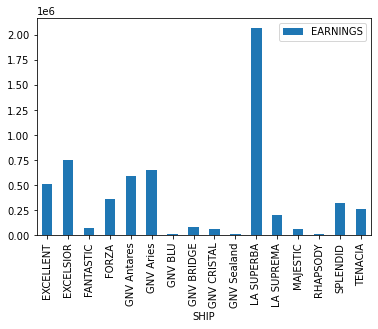

In [8]:
earnings_by_ship = pd.pivot_table(positive_quantity_df, index=['SHIP'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_ship.plot.bar()

<h2>Earnings By Month</h2>
<h4>As we can see, <strong>summer</strong> season is the stongest season of them all when it comes to earnings:</h4>

In [9]:
positive_quantity_df

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE,PRICE_BEFORE_DISCOUNT,EARNINGS,SALE_MONTH,MARGIN,MARGIN_RAW,UNIT_PRICE,MENU_CATEGORY
0,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,2,75107,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',1,0.84,0.56,0.06,SPE,1.4,0.78,1,92.86%,0.928571,0.84,SOFT DRINK
1,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,3,75123,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',2,1.68,1.12,0.13,SPE,2.8,1.55,1,92.26%,0.922619,0.84,SOFT DRINK
2,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,4,80518,8.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,1.50,0.00,0.11,NaN,1.5,1.39,1,92.67%,0.926667,1.50,SOFT DRINK
3,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.00,1.80,0.36,SA1,1.8,-0.36,1,0.0%,0.000000,0.00,FOOD
4,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CAPPUCCINO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAPPUCCINO,1,0.00,2.00,0.15,SA1,2.0,-0.15,1,0.0%,0.000000,0.00,SOFT DRINK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338035,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,0.00,1.50,0.11,SA1,1.5,-0.11,12,0.0%,0.000000,0.00,SOFT DRINK
2338036,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,6,0.00,6.00,0.81,SA1,6.0,-0.81,12,0.0%,0.000000,0.00,FOOD
2338037,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,VERDURA AL VAPORE,FOOD,RICETTE FOOD,CONTORNO,6,0.00,23.40,0.98,SA1,23.4,-0.98,12,0.0%,0.000000,0.00,FOOD
2338038,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ANELLETTI AL FORNO ALLA SICILIANA,FOOD,RICETTE FOOD,PRIMO,6,0.00,46.80,4.72,SA1,46.8,-4.72,12,0.0%,0.000000,0.00,FOOD


<AxesSubplot:xlabel='SALE_MONTH'>

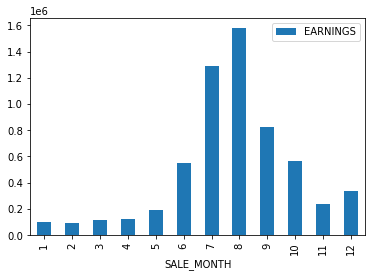

In [10]:
earnings_by_month = pd.pivot_table(positive_quantity_df, index=['SALE_MONTH'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_month.plot.bar()

SALE_MONTH        1      2      3      4      5      6      7       8      9   \
ITEM_CATEGORY CAFFE' CAFFE' CAFFE' CAFFE' CAFFE' CAFFE' CAFFE'  CAFFE' CAFFE'   
QUANTITY       20633  21689  26360  26312  33983  54981  98975  123245  78502   

SALE_MONTH        10     11     12  
ITEM_CATEGORY CAFFE' CAFFE' CAFFE'  
QUANTITY       55605  31833  41241  


<AxesSubplot:>

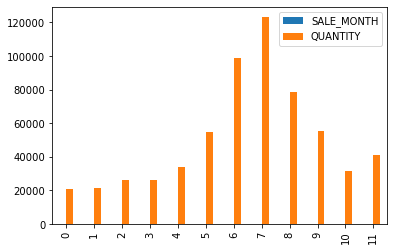

In [85]:
top_seller_by_month = pd.pivot_table(positive_quantity_df, index=['SALE_MONTH','ITEM_CATEGORY'], values=['QUANTITY'], aggfunc=np.sum)
idx = top_seller_by_month.groupby(['SALE_MONTH'])['QUANTITY'].transform(max) == top_seller_by_month['QUANTITY']
print(top_seller_by_month[idx].T)
ll = top_seller_by_month[idx]
ll.reset_index(inplace=True)
ll.plot.bar()

SALE_MONTH                      1                    2                    3   \
ITEM_CATEGORY PANE E COPERTO PASTI PANE E COPERTO PASTI PANE E COPERTO PASTI   
QUANTITY                     11910                13206                15765   

SALE_MONTH                      4                    5      6   \
ITEM_CATEGORY PANE E COPERTO PASTI PANE E COPERTO PASTI  ACQUA   
QUANTITY                     14992                17916  29146   

SALE_MONTH                        7                      8   \
ITEM_CATEGORY CROISSANTS E BREAKFAST CROISSANTS E BREAKFAST   
QUANTITY                       63189                  85501   

SALE_MONTH                        9                      10  \
ITEM_CATEGORY CROISSANTS E BREAKFAST CROISSANTS E BREAKFAST   
QUANTITY                       45326                  31594   

SALE_MONTH                      11                   12  
ITEM_CATEGORY PANE E COPERTO PASTI PANE E COPERTO PASTI  
QUANTITY                     18818                21818  


<AxesSubplot:xlabel='SALE_MONTH,ITEM_CATEGORY'>

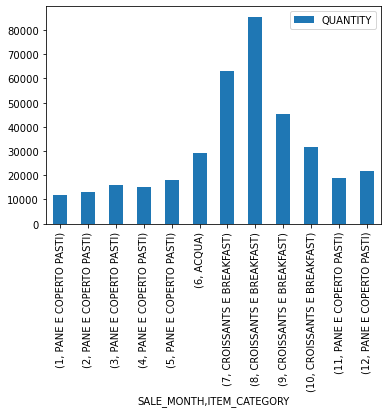

In [87]:
top_seller_by_month.reset_index(inplace=True)
second_top_seller_by_month = top_seller_by_month[top_seller_by_month["ITEM_CATEGORY"] != "CAFFE'"]
second_top_seller_by_month = pd.pivot_table(second_top_seller_by_month, index=['SALE_MONTH','ITEM_CATEGORY'], values=['QUANTITY'], aggfunc=np.sum)
idx2 = second_top_seller_by_month.groupby(['SALE_MONTH'])['QUANTITY'].transform(max) == second_top_seller_by_month['QUANTITY']
print(second_top_seller_by_month[idx2].T)
second_top_seller_by_month[idx2].plot.bar()